In [1]:
import pandas as pd
data =pd.read_csv("data/covid_19_india.csv")
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [2]:
data = data.drop(["Sno","Time","State/UnionTerritory","ConfirmedIndianNational","ConfirmedForeignNational"], axis=1)

In [3]:
data = data.rename(columns={'Date': 'date'})  #converting 'Date' to 'date' because 'Date' is inbuild variable use in python

In [4]:
data.head()

,date,Cured,Deaths,Confirmed
0,30/01/20,0,0,1
1,31/01/20,0,0,1
2,01/02/20,0,0,2
3,02/02/20,0,0,3
4,03/02/20,0,0,3


In [5]:
len(data)

1025

In [6]:
Dates = data['date'].tolist()
Confirmed = data['Confirmed'].tolist()
Deaths = data['Deaths'].tolist()
Cured = data['Cured'].tolist()


# dates = data['date'].to_numpy()

In [7]:
Confirmed[0:10]

[1, 1, 2, 3, 3, 3, 3, 3, 3, 3]

In [8]:
Dates[0:10]

['30/01/20',
 '31/01/20',
 '01/02/20',
 '02/02/20',
 '03/02/20',
 '04/02/20',
 '05/02/20',
 '06/02/20',
 '07/02/20',
 '08/02/20']

In [9]:
current_date = Dates[0]
confirm = Confirmed[0]
death = Deaths[0]
cure = Cured[0]

date =[current_date,]
confirm_cases =[]
death_cases =[]
cure_cases =[]
new_cases= [Confirmed[0],]

for i in range(1,len(Dates)): 
    if Dates[i] == current_date:
        confirm += Confirmed[i]
        death += Deaths[i]
        cure += Cured[i]
    else:
        if len(confirm_cases) != 0:
            new = abs(confirm_cases[-1] - confirm)
            new_cases.append(new)
        current_date = Dates[i]
        date.append(current_date)
        confirm_cases.append(confirm)
        confirm = Confirmed[i]
        death_cases.append(death)
        death = Deaths[i]
        cure_cases.append(cure)
        cure = Cured[i]
new_cases.append(abs(confirm_cases[-1] - confirm))
confirm_cases.append(confirm)
death_cases.append(death)
cure_cases.append(cure)


In [10]:
import copy

prediction_data = copy.deepcopy(confirm_cases)
prediction_data.pop(1)
# prediction_data.insert(len(confirm_cases),0)
len(prediction_data)

77

In [11]:
for i in range(len(confirm_cases)):
    print(date[i], confirm_cases[i], death_cases[i], cure_cases[i], new_cases[i])

30/01/20 1 0 0 1
31/01/20 1 0 0 0
01/02/20 2 0 0 1
02/02/20 3 0 0 1
03/02/20 3 0 0 0
04/02/20 3 0 0 0
05/02/20 3 0 0 0
06/02/20 3 0 0 0
07/02/20 3 0 0 0
08/02/20 3 0 0 0
09/02/20 3 0 0 0
10/02/20 3 0 0 0
11/02/20 3 0 0 0
12/02/20 3 0 0 0
13/02/20 3 0 0 0
14/02/20 3 0 0 0
15/02/20 3 0 0 0
16/02/20 3 0 0 0
17/02/20 3 0 0 0
18/02/20 3 0 0 0
19/02/20 3 0 0 0
20/02/20 3 0 0 0
21/02/20 3 0 0 0
22/02/20 3 0 0 0
23/02/20 3 0 0 0
24/02/20 3 0 0 0
25/02/20 3 0 0 0
26/02/20 3 0 0 0
27/02/20 3 0 0 0
28/02/20 3 0 0 0
29/02/20 3 0 0 0
01/03/20 3 0 0 0
02/03/20 5 0 0 2
03/03/20 6 0 3 1
04/03/20 28 0 3 22
05/03/20 30 0 3 2
06/03/20 31 0 3 1
07/03/20 34 0 3 3
08/03/20 39 0 3 5
09/03/20 46 0 3 7
10/03/20 58 0 3 12
11/03/20 60 0 3 2
12/03/20 74 0 3 14
13/03/20 81 1 3 7
14/03/20 84 2 10 3
15/03/20 110 2 13 26
16/03/20 114 2 13 4
17/03/20 137 3 14 23
18/03/20 151 3 14 14
19/03/20 173 4 20 22
20/03/20 223 4 23 50
21/03/20 283 4 23 60
22/03/20 360 7 24 77
23/03/20 433 7 24 73
24/03/20 519 9 40 86
25/03/20 60

In [12]:
date.pop()
confirm_cases.pop()
death_cases.pop()
cure_cases.pop()
new_cases.pop()

len(new_cases)

77

In [13]:
for i in range(len(confirm_cases)):
    print(date[i], confirm_cases[i], death_cases[i], cure_cases[i], new_cases[i], prediction_data[i])

30/01/20 1 0 0 1 1
31/01/20 1 0 0 0 2
01/02/20 2 0 0 1 3
02/02/20 3 0 0 1 3
03/02/20 3 0 0 0 3
04/02/20 3 0 0 0 3
05/02/20 3 0 0 0 3
06/02/20 3 0 0 0 3
07/02/20 3 0 0 0 3
08/02/20 3 0 0 0 3
09/02/20 3 0 0 0 3
10/02/20 3 0 0 0 3
11/02/20 3 0 0 0 3
12/02/20 3 0 0 0 3
13/02/20 3 0 0 0 3
14/02/20 3 0 0 0 3
15/02/20 3 0 0 0 3
16/02/20 3 0 0 0 3
17/02/20 3 0 0 0 3
18/02/20 3 0 0 0 3
19/02/20 3 0 0 0 3
20/02/20 3 0 0 0 3
21/02/20 3 0 0 0 3
22/02/20 3 0 0 0 3
23/02/20 3 0 0 0 3
24/02/20 3 0 0 0 3
25/02/20 3 0 0 0 3
26/02/20 3 0 0 0 3
27/02/20 3 0 0 0 3
28/02/20 3 0 0 0 3
29/02/20 3 0 0 0 3
01/03/20 3 0 0 0 5
02/03/20 5 0 0 2 6
03/03/20 6 0 3 1 28
04/03/20 28 0 3 22 30
05/03/20 30 0 3 2 31
06/03/20 31 0 3 1 34
07/03/20 34 0 3 3 39
08/03/20 39 0 3 5 46
09/03/20 46 0 3 7 58
10/03/20 58 0 3 12 60
11/03/20 60 0 3 2 74
12/03/20 74 0 3 14 81
13/03/20 81 1 3 7 84
14/03/20 84 2 10 3 110
15/03/20 110 2 13 26 114
16/03/20 114 2 13 4 137
17/03/20 137 3 14 23 151
18/03/20 151 3 14 14 173
19/03/20 173 4 20 

In [14]:
data = pd.DataFrame(list(zip(date, confirm_cases, new_cases, death_cases, cure_cases, prediction_data)), columns =["date", "Confirmed", "New_Cases", "Death", "Cured", "prediction_data"]) 
data

,date,Confirmed,New_Cases,Death,Cured,prediction_data
0,30/01/20,1,1,0,0,1
1,31/01/20,1,0,0,0,2
2,01/02/20,2,1,0,0,3
3,02/02/20,3,1,0,0,3
4,03/02/20,3,0,0,0,3
...,...,...,...,...,...,...
72,11/04/20,7529,768,242,653,8447
73,12/04/20,8447,918,273,765,9352
74,13/04/20,9352,905,324,980,10815
75,14/04/20,10815,1463,353,1190,11933


In [15]:
len(confirm_cases)

77

In [16]:
len(date)

77

In [17]:
import os
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [18]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#LinearRegression Model
from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing

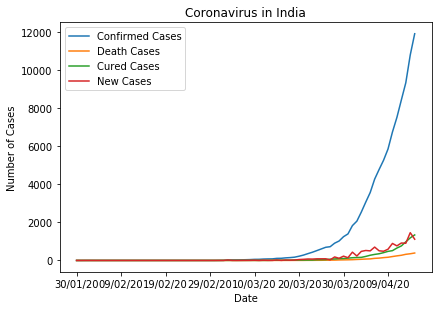

In [19]:
#Data visualization
plt.figure(1)
x_ticks = np.arange(0, 80, 10)
plt.xticks(x_ticks)
plt.plot(date,confirm_cases, label = "Confirmed Cases") 
plt.plot(date,death_cases, label = "Death Cases") 
plt.plot(date,cure_cases, label = "Cured Cases") 
plt.plot(date,new_cases, label = "New Cases") 
plt.tight_layout()
plt.xlabel('Date') 
plt.ylabel('Number of Cases') 
plt.title('Coronavirus in India') 
plt.legend() 
plt.show() 

In [20]:
data

,date,Confirmed,New_Cases,Death,Cured,prediction_data
0,30/01/20,1,1,0,0,1
1,31/01/20,1,0,0,0,2
2,01/02/20,2,1,0,0,3
3,02/02/20,3,1,0,0,3
4,03/02/20,3,0,0,0,3
...,...,...,...,...,...,...
72,11/04/20,7529,768,242,653,8447
73,12/04/20,8447,918,273,765,9352
74,13/04/20,9352,905,324,980,10815
75,14/04/20,10815,1463,353,1190,11933


In [45]:
y = data.pop("prediction_data")
ignore = data.pop("date")
x = data

KeyError: 'prediction_data'

In [ ]:
y

In [23]:
x

,Confirmed,New_Cases,Death,Cured
0,1,1,0,0
1,1,0,0,0
2,2,1,0,0
3,3,1,0,0
4,3,0,0,0
...,...,...,...,...
72,7529,768,242,653
73,8447,918,273,765
74,9352,905,324,980
75,10815,1463,353,1190


In [24]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.1,random_state=4)

In [25]:
train_x.shape,test_x.shape

((69, 4), (8, 4))

In [26]:
test_x = test_x.reset_index(drop=True)
train_x = train_x.reset_index(drop=True)

In [27]:
model1 = LinearRegression()
model1.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
test_x

,Confirmed,New_Cases,Death,Cured
0,173,22,4,20
1,3577,505,83,275
2,1251,227,31,102
3,151,14,3,14
4,3,0,0,0
5,3,0,0,0
6,8447,918,273,765
7,3,0,0,0


In [29]:
prediction = model1.predict(test_x)

In [30]:
Linear_error = np.mean((prediction - test_y)**2)
print("error ={} ".format(Linear_error))

error =16946.690779722427 


In [31]:
linear_model = pd.DataFrame({"actual" : test_y, "predicted": prediction, "difference": (prediction - test_y)})
#reset index
linear_model = linear_model.reset_index(drop=True)
linear_model

,actual,predicted,difference
0,223,199.956244,-23.043756
1,4281,3968.210677,-312.789323
2,1397,1413.693122,16.693122
3,173,179.299787,6.299787
4,3,24.597247,21.597247
5,3,24.597247,21.597247
6,9352,9540.381740,188.381740
7,3,24.597247,21.597247


In [32]:
linear_predition = linear_model.pop("predicted")
actual_data = linear_model.pop("actual")

Linear error = 16946.690779722427 %


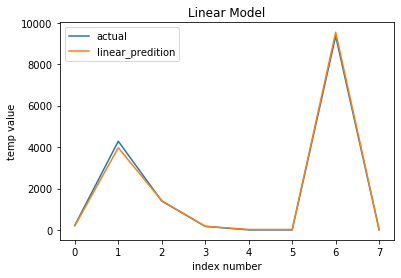

In [33]:
plt.figure(1)
plt.plot(actual_data.index,actual_data, label = "actual") 
plt.plot(linear_predition.index,linear_predition, label = "linear_predition") 
plt.xlabel('index number') 
plt.ylabel('temp value') 
plt.title('Linear Model') 
plt.legend() 
print("Linear error = {} %".format(Linear_error))
plt.show() 

In [41]:
n = {"New_Cases": 11933 ,"Death": 392,"Cured":1344, "Cured":1118}  

In [42]:
d = pd.DataFrame(list(zip([12759], [420], [1515], [826])), columns =["Confirmed", "New_Cases", "Death", "Cured"]) 
d

,Confirmed,New_Cases,Death,Cured
0,12759,420,1515,826


In [43]:
prediction = model1.predict(d)

In [44]:
prediction

array([21333.24054765])